In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from scipy.stats import norm
from sklearn.metrics import r2_score

In [24]:
# Laste poll-of-polls data
df = pd.read_csv("../data/all_v2_data.csv", sep=",")

In [25]:
ex_future=df[df['Ap'].isna()][['Mnd',
       #'Ap_skandale_lag6', 'Hoyre_skandale_lag6', 'Frp_skandale_lag6',
       #'SV_skandale_lag6', 'SP_skandale_lag6', 'KrF_skandale_lag6',
        #'Rodt_skandale_lag6',
        #'Ap_reg_lag6',
        #'Hoyre_reg_lag6', 
        #'Frp_reg_lag6','SV_reg_lag6', 
        #'SP_reg_lag6','KrF_reg_lag6',
        #'Venstre_reg_lag6', 
       'ledighet', 'ledig_trend3', 'ledig_trend6', 'styringsrente',
       'styringsrente_trend3', 'styringsrente_trend6']]

In [26]:
ex_future
ex_future["Mnd"] = pd.to_datetime(df["Mnd"])
ex_future.set_index("Mnd", inplace=True)

In [27]:
df.dropna(inplace=True)

In [28]:
# Convert to datetime and set the date to the end of the month
df["Mnd"] = pd.to_datetime(df["Mnd"])

In [29]:
# Sort values and set index
df = df.sort_values("Mnd")
df.set_index("Mnd", inplace=True)

In [30]:
df

,Ap,Hoyre,Frp,SV,SP,KrF,Venstre,MDG,Rodt,Andre,...,Rodt_reg_lag3,Rodt_reg_lag6,Andre_reg_lag3,Andre_reg_lag6,ledighet,ledig_trend3,ledig_trend6,styringsrente,styringsrente_trend3,styringsrente_trend6
Mnd,,,,,,,,,,,,,,,,,,,,,
2008-06-30,26.0,17.6,28.9,6.9,5.3,6.1,5.9,0.0,1.8,0.0,...,0.0,0.0,0.0,0.0,2.9,0.067,0.050000,5.54,0.076667,0.048333
2008-07-31,26.9,17.2,30.2,6.6,4.7,6.1,5.4,0.0,1.9,0.0,...,0.0,0.0,0.0,0.0,2.9,0.033,0.050000,5.75,0.083333,0.083333
2008-08-31,26.6,16.2,30.9,6.7,5.2,5.5,6.0,0.0,1.7,0.0,...,0.0,0.0,0.0,0.0,3.0,0.033,0.066667,5.75,0.070000,0.083333
2008-09-30,28.9,15.2,29.9,6.3,5.0,5.7,5.9,0.0,1.5,0.0,...,0.0,0.0,0.0,0.0,3.1,0.067,0.066667,5.75,0.000000,0.073333
2008-10-31,30.6,16.1,26.7,7.3,5.3,5.6,5.5,0.0,1.2,0.0,...,0.0,0.0,0.0,0.0,3.1,0.033,0.050000,5.45,-0.100000,-0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,17.2,21.2,25.4,9.4,5.3,3.9,5.3,3.1,5.8,3.5,...,0.0,0.0,0.0,0.0,4.1,0.033,0.016667,4.50,0.000000,0.000000
2025-01-31,19.1,22.2,24.1,8.0,5.9,3.4,4.5,3.3,5.6,3.9,...,0.0,0.0,0.0,0.0,4.1,0.000,0.016667,4.50,0.000000,0.000000
2025-02-28,24.8,18.4,24.6,7.4,6.6,3.0,4.2,2.4,5.4,3.2,...,0.0,0.0,0.0,0.0,4.1,0.000,0.016667,4.50,0.000000,0.000000


In [31]:
#df_diff = df.diff().dropna()  # Difference to make stationary

In [32]:
df_en=df[['Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG', 'Rodt','Andre']]

In [33]:
df_ex=df[[
       #'Ap_skandale_lag6', 'Hoyre_skandale_lag6', 'Frp_skandale_lag6',
       #'SV_skandale_lag6', 'SP_skandale_lag6', 'KrF_skandale_lag6',
       #'Venstre_skandale_lag6', 
        #'MDG_skandale_lag6', 
        #'Rodt_skandale_lag6',
       #'Andre_skandale_lag6', 
       # 'Ap_reg', 'Hoyre_reg', 'Frp_reg', 'SV_reg',
       #'SP_reg', 'KrF_reg', 'Venstre_reg', 'MDG_reg', 'Rodt_reg', 'Andre_reg',
       #'Ap_reg_lag3', 
       #'Ap_reg_lag6',
       # 'Hoyre_reg_lag6', 
       # 'Frp_reg_lag6','SV_reg_lag6', 
       # 'SP_reg_lag6','KrF_reg_lag6',
       # 'Venstre_reg_lag6', 
        #'MDG_reg_lag6',
        #'Rodt_reg_lag6', 
        #'Andre_reg_lag6',
       'ledighet', 'ledig_trend3', 'ledig_trend6', 'styringsrente',
       'styringsrente_trend3', 'styringsrente_trend6']]

In [34]:
df_ex

,ledighet,ledig_trend3,ledig_trend6,styringsrente,styringsrente_trend3,styringsrente_trend6
Mnd,,,,,,
2008-06-30,2.9,0.067,0.050000,5.54,0.076667,0.048333
2008-07-31,2.9,0.033,0.050000,5.75,0.083333,0.083333
2008-08-31,3.0,0.033,0.066667,5.75,0.070000,0.083333
2008-09-30,3.1,0.067,0.066667,5.75,0.000000,0.073333
2008-10-31,3.1,0.033,0.050000,5.45,-0.100000,-0.008333
...,...,...,...,...,...,...
2024-12-31,4.1,0.033,0.016667,4.50,0.000000,0.000000
2025-01-31,4.1,0.000,0.016667,4.50,0.000000,0.000000
2025-02-28,4.1,0.000,0.016667,4.50,0.000000,0.000000


In [35]:
model = VAR(endog=df_en, exog=df_ex)
#model = VAR(df_en)
model_fitted = model.fit(6)

print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 21, May, 2025
Time:                     13:16:44
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -1.62578
Nobs:                     197.000    HQIC:                  -8.27183
Log likelihood:          -865.297    FPE:                3.68999e-06
AIC:                     -12.7920    Det(Omega_mle):     1.97537e-07
--------------------------------------------------------------------
Results for equation Ap
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       40.819695        63.371581            0.644           0.519
ledighet                    -0.212790         0.412672           -0.516           0.606
ledig_trend3                 0.0727

C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [36]:
# Compute R² for each party
r2_scores = {}
for party in ['Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG', 'Rodt','Andre']:
    r2_scores[party] = r2_score(df_en[party].iloc[model_fitted.k_ar:], model_fitted.fittedvalues[party])

# Print R² values
for party, r2 in r2_scores.items():
    print(f"R² for {party}: {r2:.4f}")

R² for Ap: 0.9618
R² for Hoyre: 0.9453
R² for Frp: 0.9606
R² for SV: 0.9688
R² for SP: 0.9662
R² for KrF: 0.9127
R² for Venstre: 0.8472
R² for MDG: 0.9762
R² for Rodt: 0.9744
R² for Andre: 0.9603


In [37]:
# Check if the VAR model is stable (roots inside the unit circle)
print("Is the VAR model stable?", model_fitted.is_stable())

Is the VAR model stable? False


In [38]:
all_fitted= model_fitted.fittedvalues

In [39]:
all_fitted

,Ap,Hoyre,Frp,SV,SP,KrF,Venstre,MDG,Rodt,Andre
Mnd,,,,,,,,,,
2008-12-31,31.648671,17.903501,24.783629,7.495945,5.185856,5.722163,5.055905,-0.034884,0.276510,-0.194460
2009-01-31,33.487605,16.103091,23.111355,7.401755,5.588134,6.186132,5.485361,-0.161398,0.074512,-0.175235
2009-02-28,34.501540,15.110900,23.459869,7.076015,5.837450,5.686777,5.267024,-0.062160,0.244944,-0.081009
2009-03-31,32.241464,14.690059,26.332153,6.954249,5.734789,6.187015,5.173124,0.150495,-0.178715,0.062453
2009-04-30,31.316407,14.211231,27.861354,7.351582,5.794434,6.138174,5.137488,-0.194639,-0.137048,-0.053609
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19.746290,20.992240,22.536278,9.203167,6.423425,3.569417,4.706443,3.201234,5.847191,3.752975
2025-01-31,18.779503,21.752379,24.768014,8.843810,5.714574,3.398497,4.727852,3.028844,5.300075,3.478721
2025-02-28,21.087430,20.901314,24.076290,7.915813,6.362763,3.218967,4.526095,2.853572,5.410622,3.741717


In [40]:
steps = 5  # Number of steps to forecast
alpha = 0.10

forecast, lower, upper = model_fitted.forecast_interval(df_en.values[-model_fitted.k_ar:],  exog_future=ex_future, steps=steps, alpha=alpha)


In [41]:
forecast

array([[29.51867064, 17.73108444, 19.0348611 ,  7.5095751 ,  6.39129585,
         3.71274548,  4.4104402 ,  2.85461238,  4.65741315,  3.91513396],
       [32.21806497, 15.6487487 , 18.63514079,  6.90022365,  7.83977079,
         3.96260591,  4.12869739,  2.78179166,  4.12990847,  3.5563846 ],
       [34.04766381, 14.1358989 , 18.65062885,  6.52190237,  8.6658262 ,
         3.79447074,  3.99226277,  2.06213799,  4.22234512,  3.58646928],
       [35.68315789, 12.43618748, 18.20099757,  6.745132  ,  9.11588667,
         4.06297976,  3.85723435,  2.19536379,  3.66371089,  3.51110103],
       [35.28265082, 12.89539632, 17.50844582,  6.50493057, 10.46300327,
         4.02698165,  3.70197199,  2.147353  ,  3.22969666,  3.77348875]])

In [42]:
forecast_dates = pd.date_range(start="2025-05-31", periods=steps, freq='ME')
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=df_en.columns)
forecast_lower_df=pd.DataFrame(lower, index=forecast_dates, columns=df_en.columns)
forecast_upper_df=pd.DataFrame(upper, index=forecast_dates, columns=df_en.columns)

In [43]:
# Get forecast covariance in differenced scale
forecast_cov = model_fitted.forecast_cov(steps=steps)

# Cumulative sum of covariance matrices to restore original scale
for t in range(steps):
    forecast_cov[t] = np.sum(forecast_cov[:t+1], axis=0)

# Convert to DataFrames for readability
forecast_cov_df = {t: pd.DataFrame(forecast_cov[t], index=df_en.columns, columns=df_en.columns)
                            for t in range(steps)}

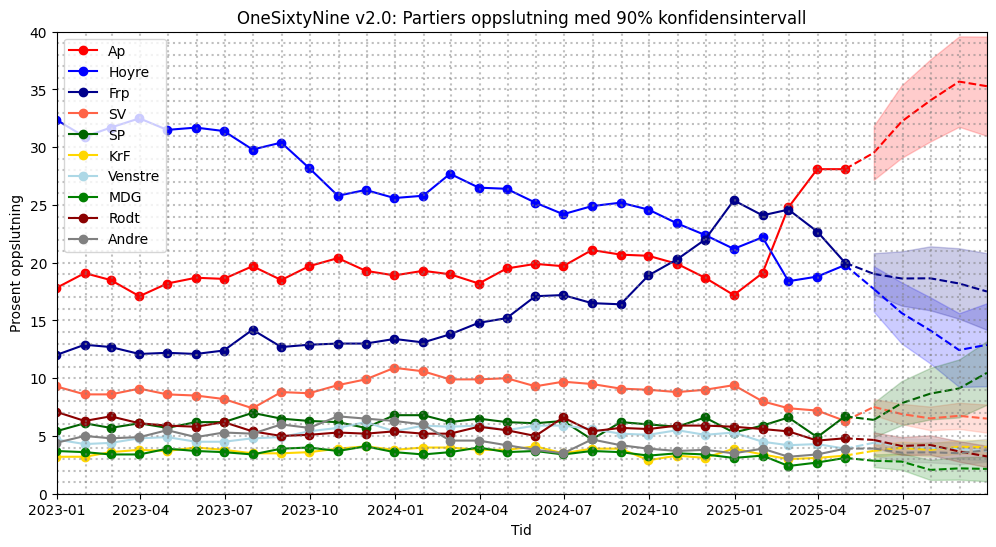

In [44]:
# Define a color map for consistency
colors = {
    'Ap': '#FF0000',        # Red
    'Hoyre': '#0000FF',     # Blue
    'Frp': '#00008B',       # Dark Blue
    'SV': '#FF6347',        # Light Red (Tomato)
    'SP': '#006400',        # Dark Green
    'KrF': '#FFD700',       # Yellow (Gold)
    'Venstre': '#ADD8E6',   # Light Blue
    'MDG': '#008000',       # Green
    'Rodt': '#8B0000',      # Dark Red
    'Andre': '#808080'      # Gray
}

plt.figure(figsize=(12, 6))

for party in colors.keys():  # Iterate over defined parties
    color = colors[party]  

    # Plot actual data
    plt.plot(df_en.index, df_en[party], marker="o", color=color, label=f"{party}")

    # Plot forecast 
    plt.plot(forecast_df.index, forecast_df[party], linestyle="dashed", color=color)

    last_actual_date = df_en.index[-1]
    first_forecast_date = forecast_df.index[0]
    last_actual_value = df_en[party].iloc[-1]
    first_forecast_value = forecast_df[party].iloc[0]

    plt.plot([last_actual_date, first_forecast_date], [last_actual_value, first_forecast_value], color=color, linestyle="dashed")
    
    # Plot confidence interval (original scale)
    plt.fill_between(forecast_df.index, 
                     forecast_lower_df[party], 
                     forecast_upper_df[party], 
                     color=color, alpha=0.2)


dates = pd.date_range(start="2023-01-01", end="2025-09-30", freq="MS")  # "MS" = Month Start
for date in dates:
    plt.axvline(date, color="gray", linestyle="dotted", alpha=0.5)

# Add horizontal grid lines every 5%
for percent in range(0, 45, 1):
    plt.axhline(percent, color="gray", linestyle="dotted", alpha=0.5)

plt.xlim(np.datetime64("2023-01-01"), np.datetime64("2025-09-30"))  # Manually set max date to Sept 2025
plt.ylim(0,40)  # Manually set max date to Sept 2025
plt.xlabel("Tid")
plt.ylabel("Prosent oppslutning")
plt.title("OneSixtyNine v2.0: Partiers oppslutning med 90% konfidensintervall")
plt.legend(loc="upper left")
plt.show()